<a href="https://colab.research.google.com/github/sherrihoumadi/btGitDoc/blob/master/Paint_Defect_Training_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount ('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
base_dir = os.path.join("/content/gdrive/My Drive/", 'Paint_Pics')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

In [0]:
train_good_parts_dir = os.path.join(train_dir, 'good_parts')  # directory with our training good parts pictures
train_paint_runs_dir = os.path.join(train_dir, 'paint_runs')  # directory with our training paint run pictures
train_scratches_dir = os.path.join(train_dir, 'scratches')  # directory with our training scratches pictures
train_seeds_dir = os.path.join(train_dir, 'seeds')  # directory with our training seeds pictures
validation_good_parts_dir = os.path.join(validation_dir, 'good_parts')  # directory with our validation good parts pictures
validation_paint_runs_dir = os.path.join(validation_dir, 'paint_runs')  # directory with our validation paint run pictures
validation_scratches_dir = os.path.join(validation_dir, 'scratches')  # directory with our validation scratches pictures
validation_seeds_dir = os.path.join(validation_dir, 'seeds')  # directory with our validation seed pictures

In [0]:
num_good_parts_tr = len(os.listdir(train_good_parts_dir))
num_paint_runs_tr = len(os.listdir(train_paint_runs_dir))
num_scratches_tr = len(os.listdir(train_scratches_dir))
num_seeds_tr = len(os.listdir(train_seeds_dir))

num_good_parts_val = len(os.listdir(validation_good_parts_dir))
num_paint_runs_val = len(os.listdir(validation_paint_runs_dir))
num_scratches_val = len(os.listdir(validation_scratches_dir))
num_seeds_val = len(os.listdir(validation_seeds_dir))

total_train = num_good_parts_tr + num_paint_runs_tr + num_scratches_tr + num_seeds_tr
total_val = num_good_parts_val + num_paint_runs_val + num_scratches_val + num_seeds_val

In [12]:
print('total training good part images:', num_good_parts_tr)
print('total training paint run images:', num_paint_runs_tr)
print('total training scratches images:', num_scratches_tr)
print('total training seeds images:', num_seeds_tr)

print('total validation good parts images:', num_good_parts_val)
print('total validation paint run images:', num_paint_runs_val)
print('total validation scratches images:', num_scratches_val)
print('total validation seeds images:', num_seeds_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training good part images: 20
total training paint run images: 12
total training scratches images: 20
total training seeds images: 20
total validation good parts images: 5
total validation paint run images: 2
total validation scratches images: 5
total validation seeds images: 5
--
Total training images: 72
Total validation images: 17


In [0]:
BATCH_SIZE = 5
IMG_SHAPE  = 150 # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [16]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 72 images belonging to 4 classes.


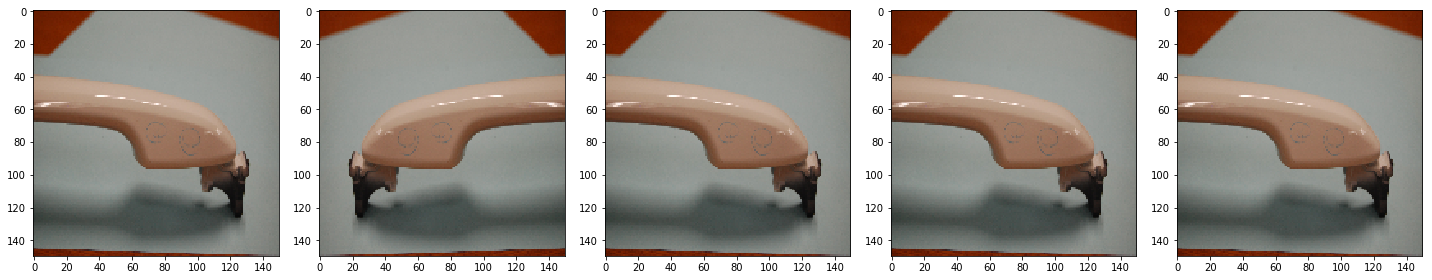

In [17]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [18]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 72 images belonging to 4 classes.


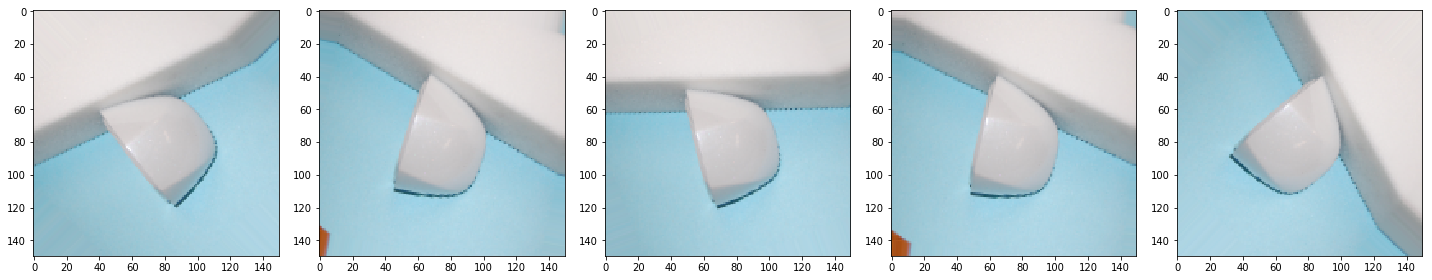

In [19]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [20]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SHAPE, IMG_SHAPE))


Found 72 images belonging to 4 classes.


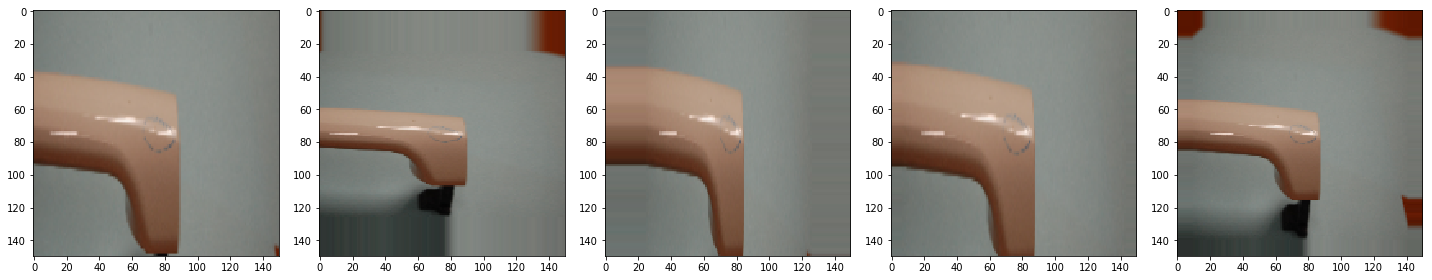

In [21]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [22]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE, 
                                                     directory=train_dir, 
                                                     shuffle=True, 
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 72 images belonging to 4 classes.


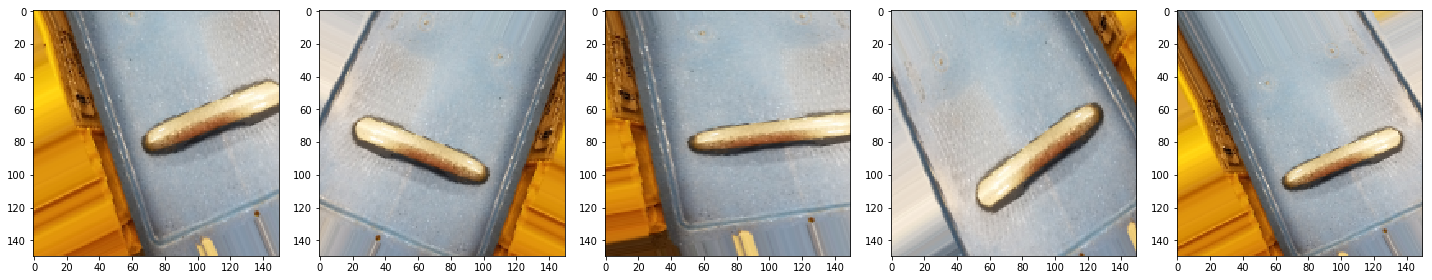

In [23]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [24]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE, 
                                                 directory=validation_dir, 
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 17 images belonging to 4 classes.


In [25]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
model = Sequential()

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [33]:
epochs=100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/100
15/15 [==============================] - 40s 3s/step - loss: 1.4246 - acc: 0.2778 - val_loss: 1.3441 - val_acc: 0.2941
Epoch 2/100
15/15 [==============================] - 7s 500ms/step - loss: 1.3814 - acc: 0.3472 - val_loss: 1.3734 - val_acc: 0.3529
Epoch 3/100
15/15 [==============================] - 12s 818ms/step - loss: 1.3160 - acc: 0.3194 - val_loss: 1.5714 - val_acc: 0.2941
Epoch 4/100
15/15 [==============================] - 12s 805ms/step - loss: 1.2612 - acc: 0.4028 - val_loss: 1.2845 - val_acc: 0.4118
Epoch 5/100
15/15 [==============================] - 12s 807ms/step - loss: 1.2207 - acc: 0.4583 - val_loss: 1.4182 - val_acc: 0.4118
Epoch 6/100
15/15 [==============================] - 12s 822ms/step - loss: 1.2059 - acc: 0.4306 - val_loss: 1.3537 - val_acc: 0.2941
Epoch 7/100
15/15 [==============================] - 12s 802ms/step - loss: 1.2246 - acc: 0.4722 - val_loss: 1.8984 - val_acc: 0.4706
Epoch 8/100
15/15 [==============================] - 12s 803ms/ste

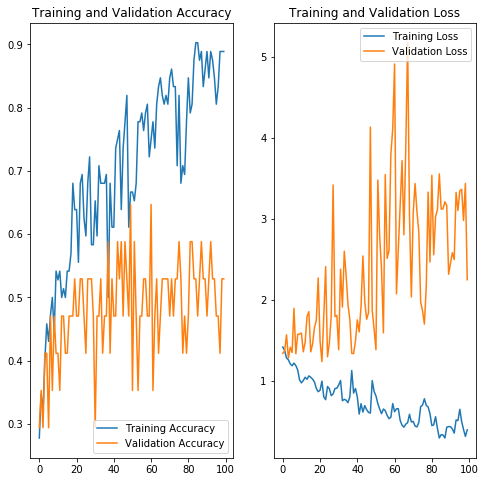

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()